# ENTRANCE TEST (No.2)

## Customer churn prediction

**Declare libraries**

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier


**Import data**

In [172]:
df1 = pd.read_csv("churn-bigml-80.csv")
df2 = pd.read_csv("churn-bigml-20.csv")

# merge data
df_train = pd.concat ([df1, df2], axis=0, ignore_index=True)

print("number of samples and number of data attributes Df",df_train.shape)

number of samples and number of data attributes Df (3333, 20)


**Print out the first 10 lines of data**

In [173]:
df_train.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


**Overview of the data frame**

In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Check for missing values**

In [175]:
df_train.dropna(inplace=True)
# detect missing values of the whole table
df_train.count()

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

**Statistics of quantitative values**

In [176]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [177]:
# Đổi dữ liệu từ dạng định danh (object) về dạng số
lb_make = LabelEncoder()
df_train["State"] = lb_make.fit_transform(df_train["State"])
df_train["International plan"] = lb_make.fit_transform(df_train["International plan"])
df_train["Voice mail plan"] = lb_make.fit_transform(df_train["Voice mail plan"])
df_train["Churn"] = lb_make.fit_transform(df_train["Churn"])
df_train.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,49,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
9,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


**Statue matrix**

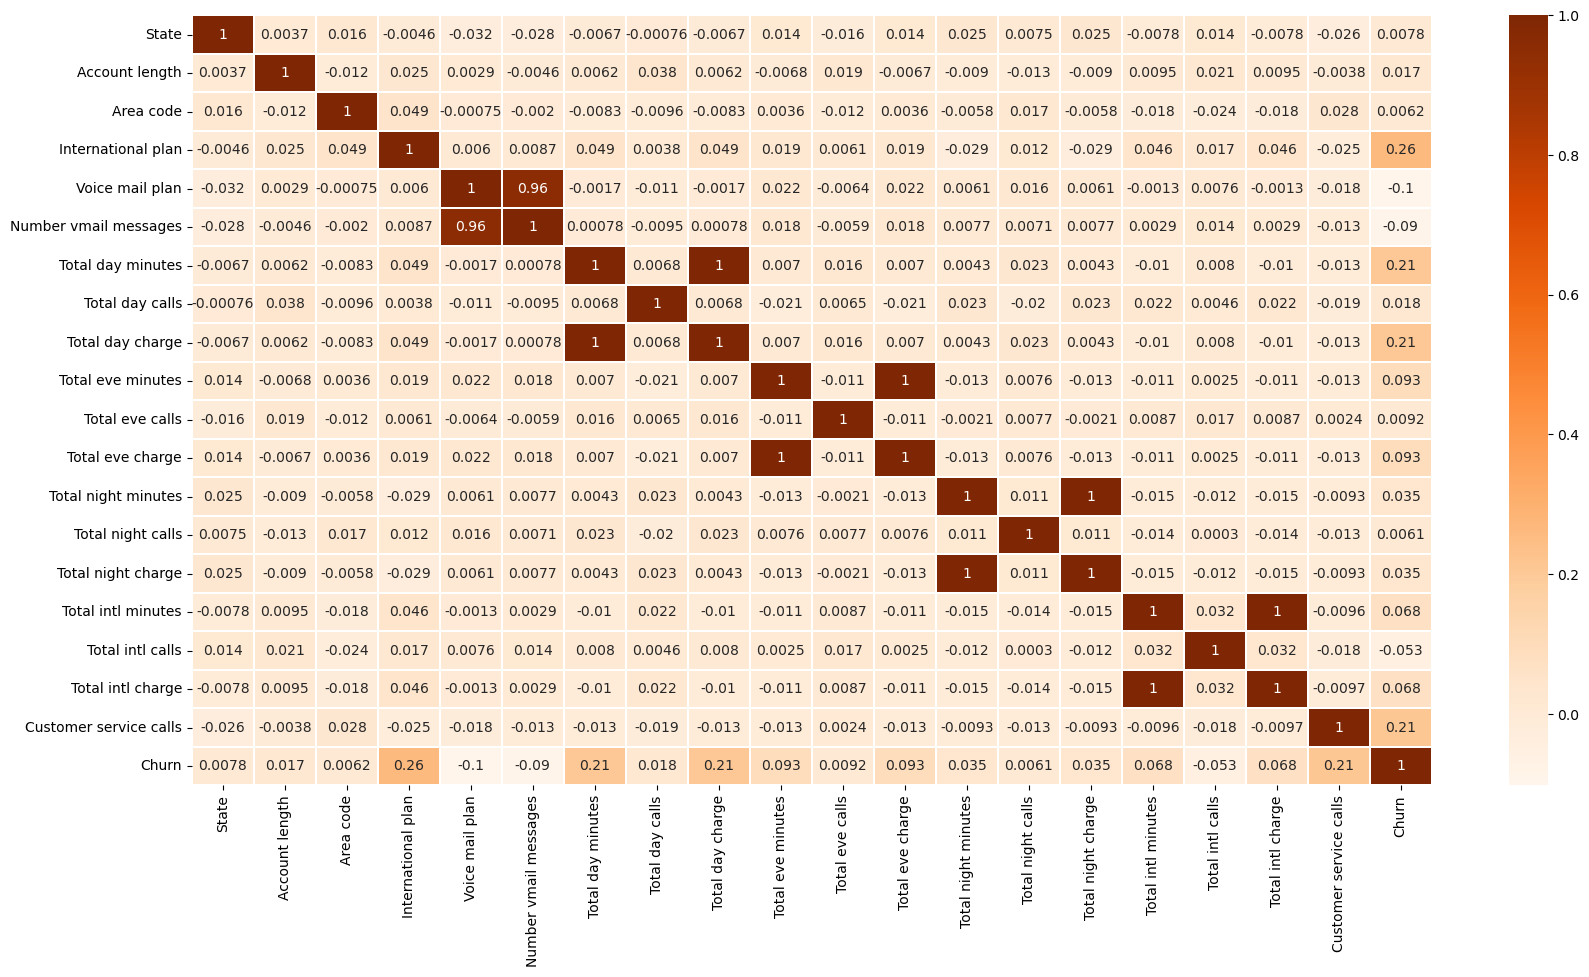

In [178]:
corr = df_train.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap = 'Oranges', linewidths=1.25)
plt.show()

**Data distribution charts**

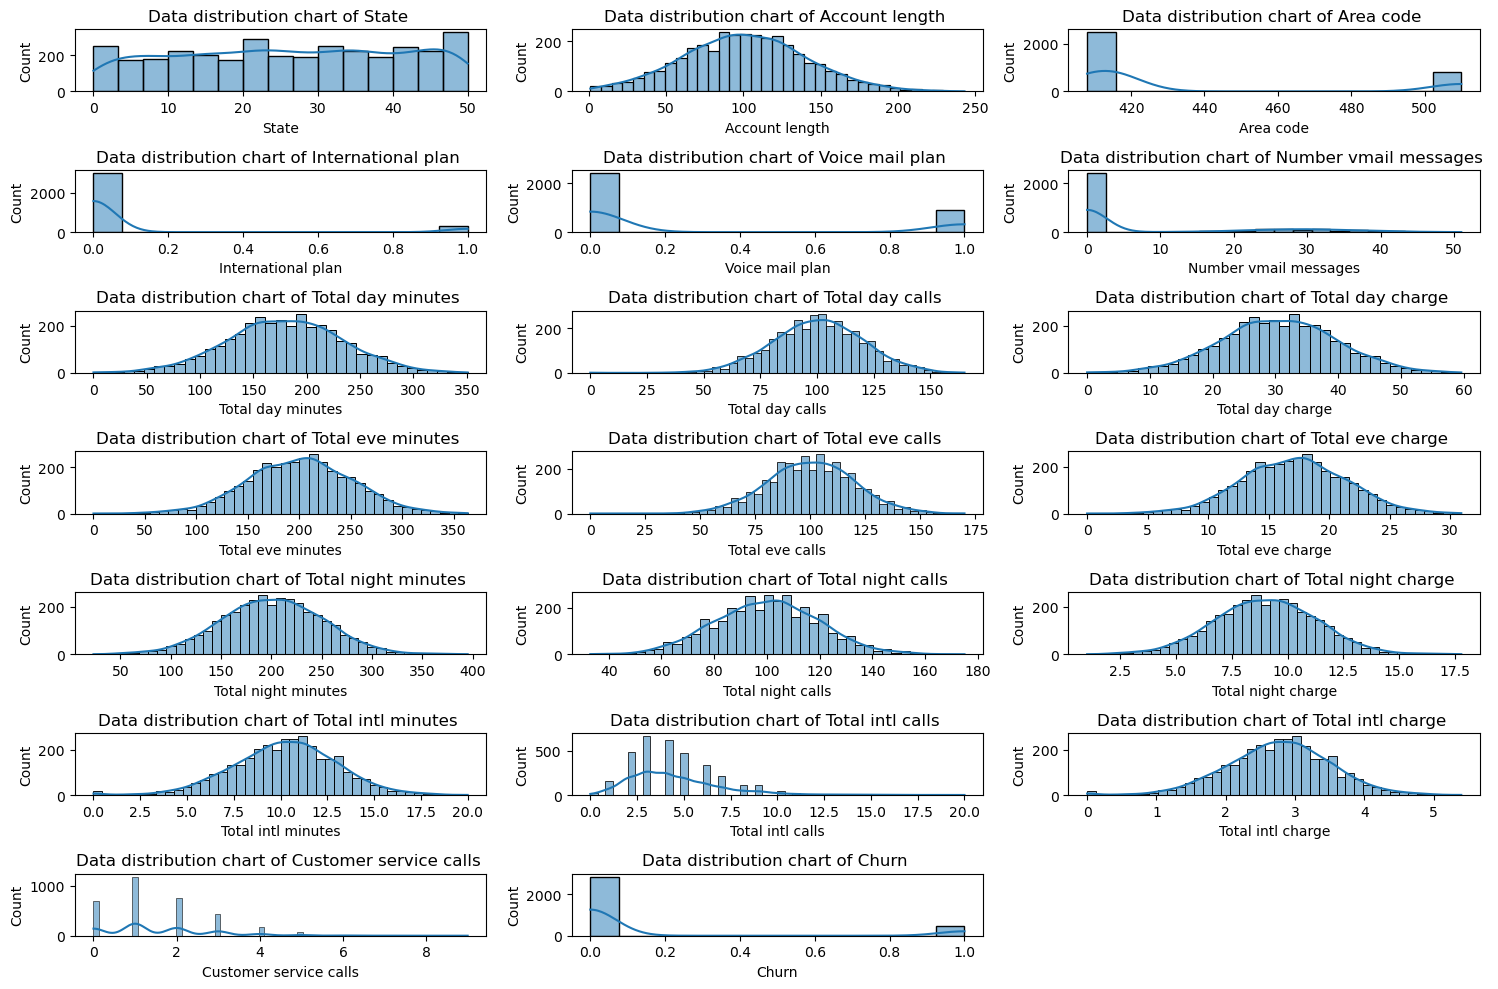

In [179]:
plt.figure( figsize = (15, 10))
for i, col in enumerate (df_train.columns,1):
    plt.subplot(7,3,i)
    plt.title(f"Data distribution chart of {col} ")
    sns.histplot(df_train[col], kde=True)
    plt.tight_layout()
    plt.plot()

**Decision Tree**

In [180]:
# Divide the data set into train and test sets
y = df_train['Churn']
X = df_train.drop( columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)
print('Total data train : %i \nTotal data test : %i' % (X_train.shape[0],X_test.shape[1]))

Total data train : 2666 
Total data test : 19


In [181]:
X_train

array([[ 0.16      ,  0.37037037,  0.93137255, ...,  0.        ,
         0.30927835,  0.        ],
       [ 0.76      , -0.37037037,  0.        , ...,  0.        ,
         0.24742268,  0.        ],
       [-1.        ,  0.03703704, -0.06862745, ...,  0.66666667,
         1.50515464,  0.        ],
       ...,
       [-0.16      , -0.16666667, -0.06862745, ...,  0.33333333,
        -1.06185567,  1.        ],
       [ 0.32      ,  1.31481481,  0.        , ...,  0.33333333,
         0.80412371,  1.        ],
       [-0.88      ,  0.44444444, -0.06862745, ...,  0.        ,
         0.24742268,  0.        ]])

In [182]:
y_train

1460    0
2000    0
666     0
2962    0
2773    0
       ..
835     0
3264    0
1653    0
2607    0
2732    0
Name: Churn, Length: 2666, dtype: int64

In [183]:
X_test

array([[-9.43396226e-01, -1.14814815e+00,  0.00000000e+00, ...,
         3.33333333e-01,  3.15789474e-01,  0.00000000e+00],
       [-1.13207547e-01,  1.00000000e+00,  0.00000000e+00, ...,
         3.33333333e-01, -9.05263158e-01,  2.00000000e+00],
       [-6.79245283e-01,  9.25925926e-02, -7.00000000e+00, ...,
         1.00000000e+00,  1.56842105e+00, -1.00000000e+00],
       ...,
       [ 4.52830189e-01, -9.62962963e-01,  9.50000000e+01, ...,
         0.00000000e+00,  1.15789474e-01,  1.00000000e+00],
       [-6.79245283e-01, -8.88888889e-01,  9.50000000e+01, ...,
        -3.33333333e-01,  8.21052632e-01, -1.00000000e+00],
       [-8.30188679e-01, -1.11111111e+00,  0.00000000e+00, ...,
         3.33333333e-01, -5.68421053e-01, -1.00000000e+00]])

In [184]:
y_test

405     0
118     0
710     0
499     0
2594    0
       ..
2255    0
242     0
1916    0
2160    0
1482    0
Name: Churn, Length: 667, dtype: int64

**Declare the ID3 decision tree model**

In [185]:
# Declare the model
model =tree.DecisionTreeClassifier(criterion ="entropy", random_state = 700, max_depth = 10, min_samples_leaf = 5)

In [186]:
# Model training
model = model.fit(X_train, y_train)

In [187]:
# Test the model
y_pred = model.predict(X_test)
print("The model predicted label value :\n ", y_pred)
print('Actual label value of the model : \n', y_test)

The model predicted label value :
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1

In [188]:
# Calculate the accuracy of the model
print('model accuracy is :', accuracy_score(y_test, y_pred)*100, '%')

model accuracy is : 93.85307346326837 %


In [189]:
# Confusion Matrix and Classification Report
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[559  15]
 [ 26  67]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.96      0.97      0.96       574
           1       0.82      0.72      0.77        93

    accuracy                           0.94       667
   macro avg       0.89      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667



**LGBM Classisfier**

In [190]:
# Declare the model
model = LGBMClassifier(random_state = 700, max_depth = 10, num_leaves = 31)

In [191]:
# model execution
model.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 390, number of negative: 2276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2436
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146287 -> initscore=-1.764028
[LightGBM] [Info] Start training from score -1.764028


LGBMClassifier(max_depth=10, random_state=700)

In [192]:
# Test the model
y_lgbm_pred = model.predict(X_test)

print("The model predicted label value :\n ", y_lgbm_pred)
print('Actual label value of the model : \n', y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
The model predicted label value :
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 

In [193]:
# Calculate the accuracy of the model
print('model accuracy is :', accuracy_score(y_test, y_lgbm_pred)*100, '%')

model accuracy is : 95.2023988005997 %


In [194]:
# Confusion Matrix and Classification Report
print('Confusion Matrix: \n', confusion_matrix(y_test, y_lgbm_pred))
print('Classification Report: \n ', classification_report(y_test, y_lgbm_pred))

Confusion Matrix: 
 [[565   9]
 [ 23  70]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.96      0.98      0.97       574
           1       0.89      0.75      0.81        93

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667



**Random Forest**

In [195]:
dt = RandomForestClassifier(max_depth = 3, max_features = 4)

In [196]:
dt.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=4)

In [197]:
y_pred = dt.predict(X_test)

In [198]:
print(" Train score : ", dt.score(X_train, y_train), " Test Score : ", dt.score(X_test, y_test))

 Train score :  0.8859714928732183  Test Score :  0.904047976011994


In [199]:
# Calculate the accuracy of the model
print('model accuracy is :', accuracy_score(y_test, y_pred)*100, '%')

model accuracy is : 90.4047976011994 %


In [200]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[574   0]
 [ 64  29]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.90      1.00      0.95       574
           1       1.00      0.31      0.48        93

    accuracy                           0.90       667
   macro avg       0.95      0.66      0.71       667
weighted avg       0.91      0.90      0.88       667



In [201]:
# Find the best parameters of the model
pram_grid = {"max_depth" :[2,3,4], 'max_features' : [3,4,5]}
clf = RandomForestClassifier()

grid = GridSearchCV(estimator = clf, param_grid = pram_grid, cv = 5)
grid_result = grid.fit(X_train, y_train)

print(grid_result)
print("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4], 'max_features': [3, 4, 5]})
Best: 0.898349 using {'max_depth': 4, 'max_features': 5}


*Run the model with parameters max_depth= ​​4, max_features=5*

In [202]:
dt = RandomForestClassifier(max_depth = 4, max_features = 5)

In [203]:
dt.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5)

In [204]:
y_pred = dt.predict(X_test)
print(" Train score : ", dt.score(X_train, y_train), " Test Score : ", dt.score(X_test, y_test))

 Train score :  0.9309827456864216  Test Score :  0.9250374812593704


In [205]:
# Calculate the accuracy of the model
print('model accuracy is :', accuracy_score(y_test, y_pred)*100, '%')

model accuracy is : 92.50374812593704 %


In [206]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[570   4]
 [ 46  47]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.93      0.99      0.96       574
           1       0.92      0.51      0.65        93

    accuracy                           0.93       667
   macro avg       0.92      0.75      0.81       667
weighted avg       0.92      0.93      0.92       667



**K-nearest neighbors**

In [207]:
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

 Max Score : 0.9145427286356822  at K =  5


Text(0, 0.5, 'Average accuracy')

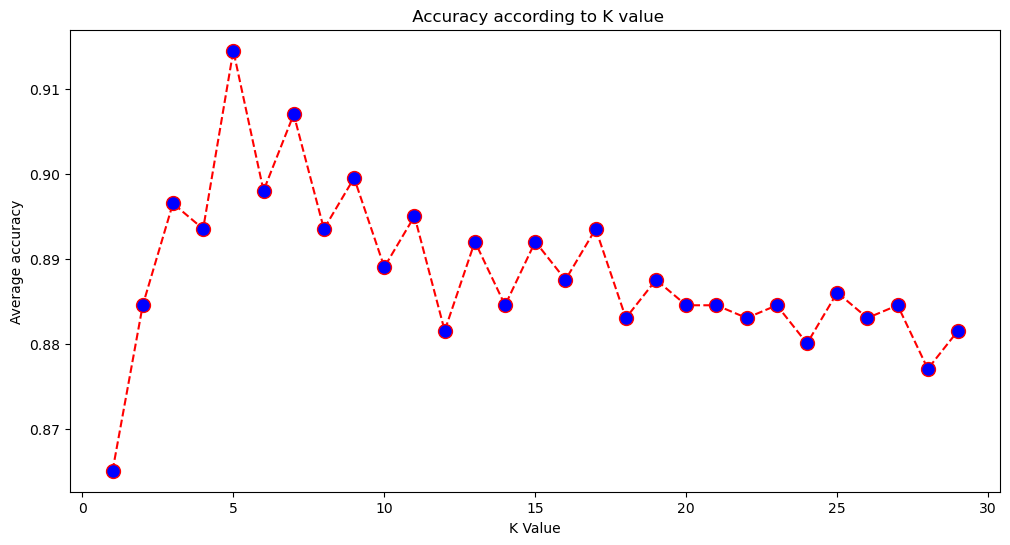

In [208]:
print(" Max Score :", max(scores), " at K = ", scores.index(max(scores)) +1)
plt.figure(figsize = (12,6))
plt.plot(range(1, 30), scores, color ='red', linestyle = 'dashed', marker ='o',
        markerfacecolor = 'blue', markersize = 10)
plt.title(' Accuracy according to K value')
plt.xlabel('K Value')
plt.ylabel('Average accuracy')

In [209]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [210]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [211]:
y_pred = knn.predict(X_test)

In [212]:
# Calculate the accuracy of the model
print('model accuracy is :', accuracy_score(y_test, y_pred)*100, '%')

model accuracy is : 91.45427286356822 %


In [213]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[572   2]
 [ 55  38]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.91      1.00      0.95       574
           1       0.95      0.41      0.57        93

    accuracy                           0.91       667
   macro avg       0.93      0.70      0.76       667
weighted avg       0.92      0.91      0.90       667

